# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Discussion](#Discussion)
* [Conclusion](#conclusion)




## Introduction: Business Problem <a name="introduction"></a>

**1.1. Background**
Toronto, Ontario, was defined as a city in 1834, with a population of 6,197,000 (2020). Toronto is Ontario’s capital city, Canada’s largest city hall, and ranked as the fourth largest city in North America. It includes the former cities of Toronto, York, Scarborough and Etobicoke, York, and East York. The city accommodates a huge number of the immigrants' population, also it’s a national and international hub for communications, cultural lives, and businesses. Canadians from the Arabian regions are one of the largest ethnic groups in Canada. In 2016, almost 523,235 people from the middle east lived in Canada, representing 1.5% of the total number of the Canadian population. In 2016, Ontario was home to approximately 43% of the overall Arab in Canada.

**1.2. Business Problem**
Being one of the most immigrant-friendly places in Canada with a huge Arab Canadian population community specifically in Toronto, we can conclude that it is one of the best places to start a middle eastern restaurant. Since I moved to Toronto from Egypt a few months ago, like anybody who left his native country, I start craving middle eastern food. I started exploring nearby places to find middle eastern food and my search resulted in a lot of restaurants from different middle eastern cultures such as Egyptian, Moroccan, Lebanese, etc. However, I faced a big challenge while searching and that is many of these restaurants are far from downtown Toronto or located in a rural neighborhood.
Therefore, I thought it would be a great idea to start a middle eastern restaurant in Toronto, so there will be no need to travel 10,000 kilometers to try incredible Middle Eastern food. However, since it will be competitive to open a restaurant in such a place, we need to make sure it’s a good idea from different aspects. The main aspects to be considered to determine the most suitable spot to start the dream restaurant is the neighborhood population, place that people tend to gather at especially the Arab community. Besides, we need to locate the most nearby middle eastern restaurants to that spot, and finally, it should provide a high profit to the owner.

## Data <a name="data"></a>

After searching for all the available datasets for Toronto neighborhoods, I settle down for three datasets to start my project with. As shown below each dataset contain a piece of unique information about Toronto that will help to discover the perfect spot to open a middle eastern restaurant:

1-	Foursquare Location Data: To get the location and the venue information.
(https://developer.foursquare.com/docs)

2-	Neighbourhoods Dataset: To get information about Toronto neighborhoods such as location, and the name of all the neighborhoods present in Toronto.  (https://open.toronto.ca/dataset/neighbourhoods/)

3-	Neighbourhood Crime Rates (http://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-)

4-	Neighbourhood Profiles Data: To get detailed information about each neighborhood in Toronto. (https://open.toronto.ca/dataset/neighbourhood-profiles/)




## **Import Libraries**

In [ ]:
!conda install -c anaconda beautifulsoup4 --yes
!conda install -c conda-forge geopy --yes # uncomment this line if you already have the pack
!pip install lxml
!pip install html5lib

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter('ignore')

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import requests
import pandas as pd

print('Libraries imported.')

Libraries imported.


### Make sure that you have created a Foursquare developer account and have your credentials handy

In [3]:

CLIENT_ID = 'VPMUJKOPPKFWQQJICNLB45XFTKEMBZUPP2GQLHBSL34HPPH5' # your Foursquare ID
CLIENT_SECRET = '5DGHTIVQDKSEJJVOBAGJXXUMTLKF3ZY3EHSQGPNQ4SKA2WGN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VPMUJKOPPKFWQQJICNLB45XFTKEMBZUPP2GQLHBSL34HPPH5
CLIENT_SECRET:5DGHTIVQDKSEJJVOBAGJXXUMTLKF3ZY3EHSQGPNQ4SKA2WGN


### In order to define an instance of the geocoder, we need to define a user_agent.We will name our agent ny_explorer, as shown below

In [4]:

address = 'Toronto, TO'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


### First, let's create the GET request URL. Name your URL. Then we create a function that extracts the category of the venue. Finally, we are ready to clean the json and structure it into a *pandas* dataframe.

In [5]:

def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Methodology <a name="methodology"></a>

This report aims to analyze the neighborhoods of Toronto city from different data sets and find the perfect spot to open a middle eastern restaurant. The following datasets will be utilized in the project:

1)	 Neighbourhoods Dataset:
This dataset contains neighborhood names as well as the geographic coordinates (latitude and longitude). The geographic coordinates will be used for two purposes; visualize Toronto map using choropleth map with Folium and call Foursquare API to determine the up to 10 food vendors within the center of each neighbourhood.


2) FourSquare:                                                     
Foursquare API is used to collect data to find the most common venues within a specific radius of a given geographic coordinate. In addition, we will find the total restaurants and middle eastern restaurants in each neighborhood.

3)	Neighborhood Profile Toronto:
This dataset contains the data for each of City of Toronto’s neighbourhoods, they are collected during the latest Census of Population in 2016. Data collected contains age and sex, families and households, language, immigration and internal migration, ethnocultural diversity, Aboriginal peoples, housing, education, income, and labour. These social planning neighbourhoods were developed by the City of Toronto to help government and community organizations with local planning by providing socio-economic data at a meaningful geographic area. 

4)	Neighbourhood Crime Rates:
This dataset contains Crime Data by Neighbourhood. Data includes four-year averages and crime rates per 100,000 people by neighbourhood based on 2016 Census Population. The crime rates will be added to the final table to find the safest place to open a restaurant. We only choose the rates from 2019 for the following crimes: Assault, Auto Theft, Break and Enter, Robbery, Theft Over and Homicide. Then we calculated the total rate for each neighborhood for all crimes combined.



## Neighbourhoods Dataset: To get information about Toronto such as neighborhoods name, Longitude, and Latitude

In [6]:
import urllib
import json
import pandas as pd
 
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:
 
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "4def3f65-2a65-4a4f-83c4-b2a4aed72d46"}
response = urllib.request.urlopen(url, data=bytes(json.dumps(params), encoding="utf-8"))
package = json.loads(response.read())
print(package["result"])
 
# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:
 
for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        r = urllib.request.urlopen(url, data=bytes(json.dumps(p), encoding="utf-8"))
        data = json.loads(r.read())
        df5 = pd.DataFrame(data["result"]["records"])
        break
        
    

{'license_title': 'Open Government Licence – Toronto', 'owner_unit': None, 'relationships_as_object': [], 'topics': 'Locations and mapping', 'owner_email': 'opendata@toronto.ca', 'excerpt': 'Boundaries of Toronto Neighbourhoods.', 'private': False, 'owner_division': 'Social Development, Finance & Administration', 'num_tags': 9, 'id': '4def3f65-2a65-4a4f-83c4-b2a4aed72d46', 'metadata_created': '2019-07-23T17:47:38.364157', 'refresh_rate': 'As available', 'title': 'Neighbourhoods', 'license_url': 'https://open.toronto.ca/open-data-license/', 'state': 'active', 'information_url': 'http://www.toronto.ca/demographics/neighbourhoods.htm', 'license_id': 'open-government-licence-toronto', 'type': 'dataset', 'resources': [{'cache_last_updated': None, 'package_id': '4def3f65-2a65-4a4f-83c4-b2a4aed72d46', 'datastore_active': True, 'id': 'a083c865-6d60-4d1d-b6c6-b0c8a85f9c15', 'size': None, 'format': 'GeoJSON', 'state': 'active', 'hash': '', 'description': '', 'is_preview': True, 'last_modified': 

In [7]:
df5 = df5[['AREA_NAME','LONGITUDE','LATITUDE']]
df5.head()
df5.AREA_NAME = df5.AREA_NAME.str.split('(').str[0].str.strip()
df5.rename(columns={'AREA_NAME':'Neighborhood'},inplace=True)
df5.rename(columns={'LONGITUDE':'Longitude'},inplace=True)
df5.rename(columns={'LATITUDE':'Latitude'},inplace=True)
df5.head()

,Neighborhood,Longitude,Latitude
0,Wychwood,-79.425515,43.676919
1,Yonge-Eglinton,-79.403590,43.704689
2,Yonge-St.Clair,-79.397871,43.687859
3,York University Heights,-79.488883,43.765736
4,Yorkdale-Glen Park,-79.457108,43.714672


###  create a map of Toronto using latitude and longitude values


In [8]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df5['Latitude'], df5['Longitude'], df5['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Now write the code to run the above function on each neighborhood and create a new dataframe called *Toronto_venues*.

In [9]:
Toronto_venues = getNearbyVenues(names=df5['Neighborhood'],
                                   latitudes=df5['Latitude'],
                                   longitudes=df5['Longitude']
                                  )


Wychwood
Yonge-Eglinton
Yonge-St.Clair
York University Heights
Yorkdale-Glen Park
Lambton Baby Point
Lansing-Westgate
Lawrence Park North
Lawrence Park South
Leaside-Bennington
Little Portugal
Long Branch
Malvern
Maple Leaf
Markland Wood
Milliken
Mimico
Morningside
Moss Park
Mount Dennis
Mount Olive-Silverstone-Jamestown
Mount Pleasant East
Mount Pleasant West
New Toronto
Newtonbrook East
Newtonbrook West
Niagara
North Riverdale
North St.James Town
O'Connor-Parkview
Oakridge
Oakwood Village
Old East York
Palmerston-Little Italy
Parkwoods-Donalda
Pelmo Park-Humberlea
Playter Estates-Danforth
Pleasant View
Princess-Rosethorn
Regent Park
Rexdale-Kipling
Rockcliffe-Smythe
Roncesvalles
Rosedale-Moore Park
Rouge
Runnymede-Bloor West Village
Rustic
Scarborough Village
South Parkdale
South Riverdale
St.Andrew-Windfields
Steeles
Stonegate-Queensway
Tam O'Shanter-Sullivan
Taylor-Massey
The Beaches
Thistletown-Beaumond Heights
Thorncliffe Park
Trinity-Bellwoods
University
Victoria Village
Waterfr

In [10]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1522, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park
3,Wychwood,43.676919,-79.425515,Annabelle Pasta Bar,43.675445,-79.423341,Italian Restaurant
4,Wychwood,43.676919,-79.425515,Marian Engel Park,43.673754,-79.423988,Park


### Let's check how many venues were returned for each neighborhood

In [11]:
Toronto_venues.groupby('Neighborhood').count()
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space
2,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park
3,Wychwood,43.676919,-79.425515,Annabelle Pasta Bar,43.675445,-79.423341,Italian Restaurant
4,Wychwood,43.676919,-79.425515,Marian Engel Park,43.673754,-79.423988,Park


### Let's find out how many unique categories can be curated from all the returned venues

In [12]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 245 uniques categories.


## Analyze Each Neighborhood


### one hot encoding


In [13]:
toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
toronto_onehot.insert(loc=0, column='Neighborhood', value=Toronto_venues['Neighborhood'] )
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped.head()


,Neighborhood,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,School,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,South American Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Agincourt North,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,Agin

In [14]:
toronto_grouped1 = toronto_grouped.loc[:, toronto_grouped.columns.str.contains('Restaurant')]
toronto_grouped1['Total Restaurants'] = toronto_grouped1.sum(axis=1)
#Adding back Neighborhood column and resetting index so that we can manipulate its data.
toronto_grouped1['Neighborhood'] = toronto_grouped['Neighborhood'] 
toronto_grouped1.set_index('Neighborhood', inplace = True)
toronto_grouped1.reset_index(inplace=True)
toronto_grouped1.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total Restaurants
0,Agincourt North,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5
1,Agincourt South-Malvern West,1,0,1,0,1,0,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,15
2,Alderwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Annex,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5
4,Banbury-Don Mills,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


### Find Total restaurants in each neighborhood


In [15]:
toronto_group = toronto_grouped1[['Neighborhood','Total Restaurants']]
toronto_group.head()


,Neighborhood,Total Restaurants
0,Agincourt North,5
1,Agincourt South-Malvern West,15
2,Alderwood,0
3,Annex,5
4,Banbury-Don Mills,2


### Find Total Middle eastern restaurants in each neighborhood


In [16]:
# Find Total Middle eastern restaurants in each neighborhood including
toronto_part = toronto_grouped[['Neighborhood', 'Middle Eastern Restaurant','Mediterranean Restaurant','Falafel Restaurant','Syrian Restaurant']]
toronto_part['Total Middle Eastern Restaurants'] = toronto_part.sum(axis=1)
toronto_part.head()

,Neighborhood,Middle Eastern Restaurant,Mediterranean Restaurant,Falafel Restaurant,Syrian Restaurant,Total Middle Eastern Restaurants
0,Agincourt North,0,0,0,0,0
1,Agincourt South-Malvern West,0,1,0,0,1
2,Alderwood,0,0,0,0,0
3,Annex,1,0,0,0,1
4,Banbury-Don Mills,0,0,0,0,0


In [50]:
toronto_part = toronto_part[['Neighborhood', 'Total Middle Eastern Restaurants']]
toronto_merged = pd.merge(df5, toronto_part, on='Neighborhood')
toronto_merged = pd.merge(toronto_merged, toronto_group, on='Neighborhood')
toronto_merged = toronto_merged.sort_values(by=['Total Middle Eastern Restaurants','Total Restaurants'], ascending=[False,False])
toronto_merged.head()

,Neighborhood,Longitude,Latitude,Total Middle Eastern Restaurants,Total Restaurants
72,Church-Yonge Corridor,-79.379017,43.659649,6,28
22,Mount Pleasant West,-79.393360,43.704435,3,27
82,Bay Street Corridor,-79.385721,43.657511,2,18
64,Wexford/Maryvale,-79.298637,43.748572,2,4
35,Playter Estates-Danforth,-79.354887,43.679700,1,18


### Plot the relation between Total restaurants and middle eastern restaurants

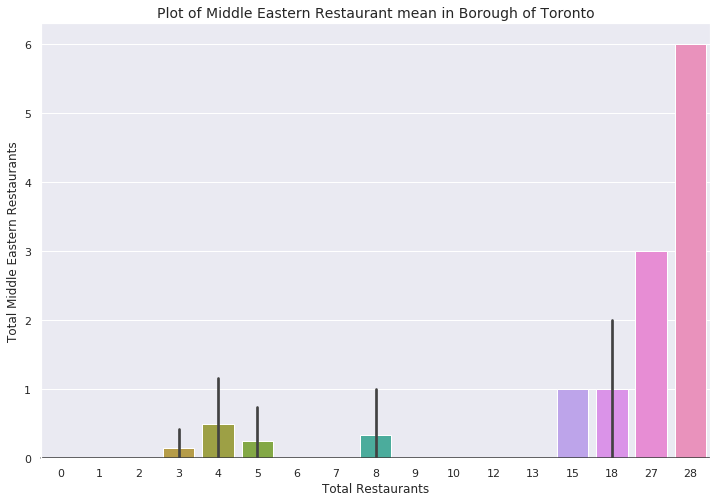

In [18]:
# Let's try Categorical plot 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.barplot(y="Total Middle Eastern Restaurants", x="Total Restaurants", data=toronto_merged);
plt.axhline(0, color="k", clip_on=False)

plt.title('Plot of Middle Eastern Restaurant mean in Borough of Toronto', fontsize=14)
plt.show()

### Plot the relation between number of middle eastern restaurants adn neighborhood

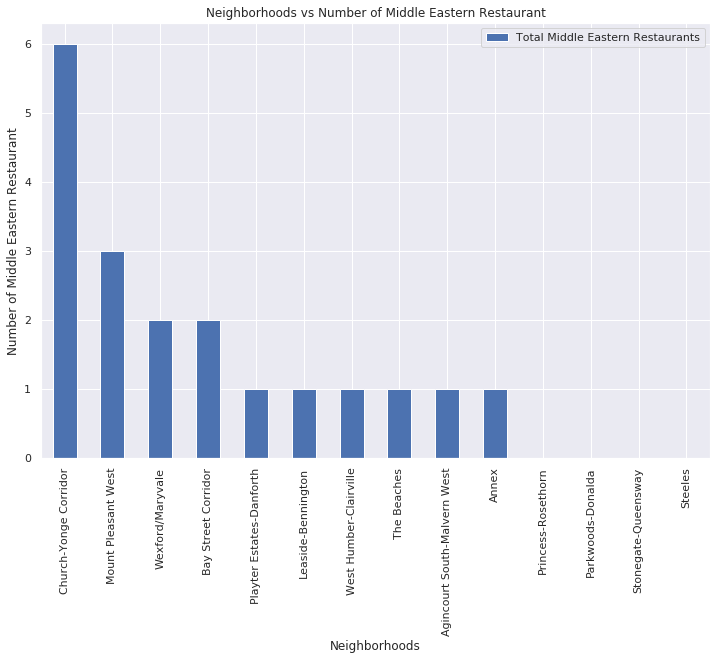

In [19]:
graph = pd.DataFrame(toronto_merged.groupby('Neighborhood')['Total Middle Eastern Restaurants'].sum())
graph = graph.sort_values(by ='Total Middle Eastern Restaurants', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(12,8))
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Middle Eastern Restaurant")
plt.title("Neighborhoods vs Number of Middle Eastern Restaurant")
plt.show()

### Let's discover each neighborhood along with the top 10 most common venues

In [20]:
for hood in toronto_grouped1['Neighborhood']:
    temp = toronto_grouped1[toronto_grouped1['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['cuisine','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    


### Let's put that into a *pandas* dataframe

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top cuisine
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common cuisine'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common cuisine'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped1['Neighborhood']

for ind in np.arange(toronto_grouped1.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped1.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common cuisine,2nd Most Common cuisine,3rd Most Common cuisine,4th Most Common cuisine,5th Most Common cuisine,6th Most Common cuisine,7th Most Common cuisine,8th Most Common cuisine,9th Most Common cuisine,10th Most Common cuisine
0,Agincourt North,Total Restaurants,Chinese Restaurant,Japanese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Caribbean Restaurant,Korean Restaurant,Argentinian Restaurant,Italian Restaurant
1,Agincourt South-Malvern West,Total Restaurants,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Cantonese Restaurant,Filipino Restaurant,Mediterranean Restaurant,Restaurant,Malay Restaurant,American Restaurant
2,Alderwood,Total Restaurants,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant
3,Annex,Total Restaurants,Middle Eastern Restaurant,French Restaurant,Indian Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Tapas Restaurant,Indonesian Restaurant,Turkish Restaurant
4,Banbury-Don Mills,Total Restaurants,Italian Restaurant,Cantonese Restaurant,Falafel Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant


## Results and Discussion <a name="results"></a>

### 1) Find the total score for each neighborhood ###

A standardized score will be calculated for each neighbourhood by using MinMaxScaler in python with a range of 0-100. To be accurate, all values will be added except the crime rate, we convert it to a negative value so it will be subtracted from the total score of each neighborhood. Furthermore, we will sort values in descending sorting so we can see the highest score, as shown in figure Waterfront Communities- The Island have the best score with 100%.


## Neighbourhood Profiles Dataset after cleaning data and adding the neighborhood score 100%

In [41]:
df = pd.read_csv('Final_toronto')
df.drop(['Unnamed: 0'],axis=1,inplace=True) 
df.head()

,Neighborhood,Total Population,Persons living alone (total),Ethnic origin(Middle Eastern),Language(Arabic),Target Age(youth and working age),"Target income (40,000$ +)",Neighbourhood Crimes rate,Total score(%)
0,Waterfront Communities-The Island,65913,22035,4210,1535,52945,34230,-2139.2,100.0
1,Willowdale East,50434,7380,8805,1755,32790,15185,-747.5,62.4
2,Woburn,53485,4220,2655,735,29605,9535,-1237.9,52.5
3,Rouge,46496,1640,1280,340,25210,12060,-802.2,44.9
4,Niagara,31180,10075,1440,415,25735,16235,-1581.1,43.3


### 2) Add the clusters to Neighbourhood Profiles Dataset

In [42]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = df.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 2, 2, 4, 2, 4, 4, 4, 4], dtype=int32)

### 3) Merge neighborhood profile dataset and top 10 most common venues ####
### 4) Find the best two clusters out of the 5 clusters and delete the rest

In [43]:
# add clustering labels
df.insert(0, 'Cluster Labels', kmeans.labels_)
df1 = df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
df1 = df1.join(df5.set_index('Neighborhood'), on='Neighborhood')
df1.drop(df[df['Cluster Labels'] > 3].index, inplace = True) 
df1.drop(df[df['Cluster Labels'] < 2].index, inplace = True) 

df1.head()



,Cluster Labels,Neighborhood,Total Population,Persons living alone (total),Ethnic origin(Middle Eastern),Language(Arabic),Target Age(youth and working age),"Target income (40,000$ +)",Neighbourhood Crimes rate,Total score(%),1st Most Common cuisine,2nd Most Common cuisine,3rd Most Common cuisine,4th Most Common cuisine,5th Most Common cuisine,6th Most Common cuisine,7th Most Common cuisine,8th Most Common cuisine,9th Most Common cuisine,10th Most Common cuisine,Longitude,Latitude
0,3,Waterfront Communities-The Island,65913,22035,4210,1535,52945,34230,-2139.2,100.0,Total Restaurants,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,-79.377202,43.633880
1,2,Willowdale East,50434,7380,8805,1755,32790,15185,-747.5,62.4,Total Restaurants,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,-79.401484,43.770602
2,2,Woburn,53485,4220,2655,735,29605,9535,-1237.9,52.5,Total Restaurants,Indian Restaurant,American Restaurant,Turkish Restaurant,Ethiopian Restaurant,Italian Restaurant,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,German Restaurant,-79.228586,43.766740
3,2,Rouge,46496,1640,1280,340,25210,12060,-802.2,44.9,Total Restaurants,Restaurant,Fast Food Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,-79.186343,43.821201
5,2,Malvern,43794,2110,1430,600,24485,7595,-1153.1,40.5,Total Restaurants,Fast Food Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,-79.222517,43.803658


#### As shown in the table above, we only have two clusters(2 and 3). Cluster three include one neighborhood which is the best one. Cluster 3 include 4 neighborhoods which are the second best neighborhoods group ####

#### Finally, let's visualize the resulting clusters (2 and 3 )

In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df1['Latitude'], df1['Longitude'], df1['Neighborhood'], df1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Marker(
        [lat, lon],
        popup=label).add_to(map_clusters)

map_clusters

### 5)  Examine Clusters

In [45]:
df1.loc[df1['Cluster Labels'] == 3, df1.columns[[1] + list(range(2, df1.shape[1]))]].head(10)

,Neighborhood,Total Population,Persons living alone (total),Ethnic origin(Middle Eastern),Language(Arabic),Target Age(youth and working age),"Target income (40,000$ +)",Neighbourhood Crimes rate,Total score(%),1st Most Common cuisine,2nd Most Common cuisine,3rd Most Common cuisine,4th Most Common cuisine,5th Most Common cuisine,6th Most Common cuisine,7th Most Common cuisine,8th Most Common cuisine,9th Most Common cuisine,10th Most Common cuisine,Longitude,Latitude
0,Waterfront Communities-The Island,65913,22035,4210,1535,52945,34230,-2139.2,100.0,Total Restaurants,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,-79.377202,43.63388


In [46]:
df1.loc[df1['Cluster Labels'] == 2, df1.columns[[1] + list(range(5, df1.shape[1]))]].head(10)

,Neighborhood,Language(Arabic),Target Age(youth and working age),"Target income (40,000$ +)",Neighbourhood Crimes rate,Total score(%),1st Most Common cuisine,2nd Most Common cuisine,3rd Most Common cuisine,4th Most Common cuisine,5th Most Common cuisine,6th Most Common cuisine,7th Most Common cuisine,8th Most Common cuisine,9th Most Common cuisine,10th Most Common cuisine,Longitude,Latitude
1,Willowdale East,1755,32790,15185,-747.5,62.4,Total Restaurants,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,-79.401484,43.770602
2,Woburn,735,29605,9535,-1237.9,52.5,Total Restaurants,Indian Restaurant,American Restaurant,Turkish Restaurant,Ethiopian Restaurant,Italian Restaurant,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,German Restaurant,-79.228586,43.766740
3,Rouge,340,25210,12060,-802.2,44.9,Total Restaurants,Restaurant,Fast Food Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,-79.186343,43.821201
5,Malvern,600,24485,7595,-1153.1,40.5,Total Restaurants,Fast Food Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,-79.222517,43.803658


### 6) Examine cluster 2 Further


In [47]:
cluster_2 = df1.loc[df1['Cluster Labels'] == 2, df1.columns[[1] + list(range(2, df1.shape[1]))]].head()
cluster_2['Neighbourhood Crimes rate'] = cluster_2['Neighbourhood Crimes rate'].apply(lambda x: -x)
cluster_2.head()

,Neighborhood,Total Population,Persons living alone (total),Ethnic origin(Middle Eastern),Language(Arabic),Target Age(youth and working age),"Target income (40,000$ +)",Neighbourhood Crimes rate,Total score(%),1st Most Common cuisine,2nd Most Common cuisine,3rd Most Common cuisine,4th Most Common cuisine,5th Most Common cuisine,6th Most Common cuisine,7th Most Common cuisine,8th Most Common cuisine,9th Most Common cuisine,10th Most Common cuisine,Longitude,Latitude
1,Willowdale East,50434,7380,8805,1755,32790,15185,747.5,62.4,Total Restaurants,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,-79.401484,43.770602
2,Woburn,53485,4220,2655,735,29605,9535,1237.9,52.5,Total Restaurants,Indian Restaurant,American Restaurant,Turkish Restaurant,Ethiopian Restaurant,Italian Restaurant,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,German Restaurant,-79.228586,43.766740
3,Rouge,46496,1640,1280,340,25210,12060,802.2,44.9,Total Restaurants,Restaurant,Fast Food Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,-79.186343,43.821201
5,Malvern,43794,2110,1430,600,24485,7595,1153.1,40.5,Total Restaurants,Fast Food Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Greek Restaurant,German Restaurant,French Restaurant,-79.222517,43.803658


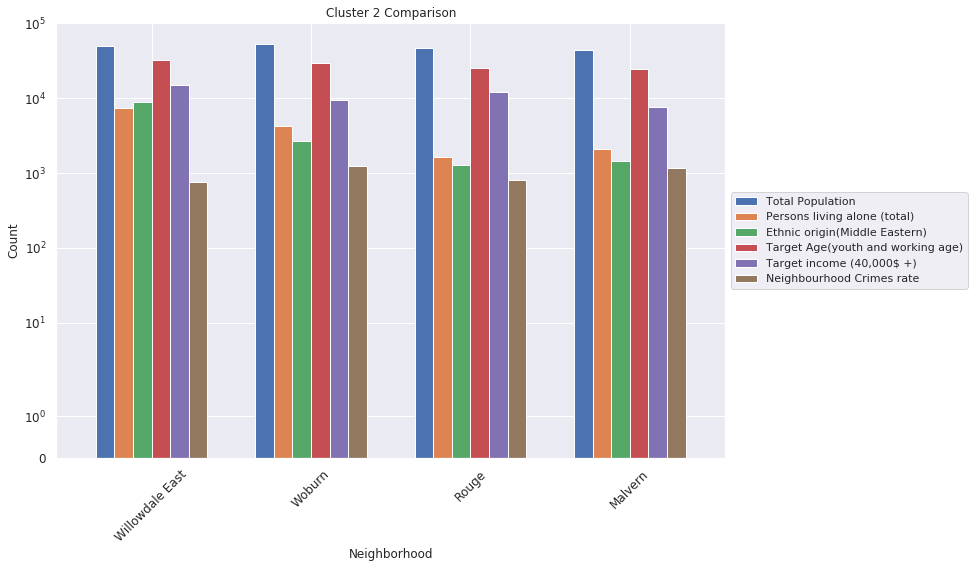

In [48]:
%matplotlib inline

ax = cluster_2.plot(x='Neighborhood',y=['Total Population','Persons living alone (total)','Ethnic origin(Middle Eastern)','Target Age(youth and working age)','Target income (40,000$ +)','Neighbourhood Crimes rate'],kind='bar',alpha=1,title='Cluster 2 Comparison',rot=45,fontsize=12,figsize=(12,8),width=0.7)
ax.set_ylabel('Count')
ax.set_yscale('symlog')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Discussion <a name="Discussion"></a> ##
The aim of this study was to explore different neighborhoods in Toronto based on some criteria collected from different datasets. The following points summarize the datasets and features collected from each one:

1)	The first criteria are from neighborhood profile dataset which includes Total Population, Persons living alone, Ethnic origin (Middle Eastern), Language (Arabic), Target Age (youth and working age), Target income (40,000$ +). 

2)	The second criteria are the crime rate in each neighborhood which are calculated from Neighbourhood Crime Rates dataset and includes different types of crime.

3)	Finally, FourSquare API is used to find the top 10 common venues from each neighborhood to assure that the selected neighborhood won’t have any other middle eastern restaurant.

## Conclusion <a name="conclusion"></a> ##

Opening a restaurant is a risky investment that can lead to a large loss if not well studied and analyzed. Thus, in this project, I demonstrated the workflow necessary for an investor to determine what is the perfect spot to open a restaurant. To be more specific, I determined the optimal location to open a middle eastern restaurant in Toronto according to different aspect gathered from different data sources. From the results discovered in this research, the following observations and recommendations can be made:

1)	Based on this research results and the criteria given by the datasets and the clustering, the best neighborhood recommended would be Waterfront Communities — The Island neighborhood. With a total score of 100/100 and grouped in cluster 3 alone for being better than all other neighborhoods with a big difference. We can conclude that this location would be a hot spot to open a middle eastern restaurant.
2)	A secondary recommendation is made for the neighborhood of Willowdale East. This neighborhood is ranked the second in the top five total score assessment, with a score of 62.4/100. We can consider it as a second option to open our restaurant.
3)	Lastly, all selected neighborhood doesn’t have any middle eastern restaurants in the top 10 common venues, so opening a middle eastern restaurant in those neighborhoods would be a great investment.


Hopefully, this kind of research and analysis will provide the initial guidance to decide where to open a middle eastern restaurant in Toronto, also it would be a great start for anyone who wants to have a better understanding of real- life examples using data-science.



